# SI 618: Data Manipulation and Analysis
## 02 - Introduction to pandas
### Dr. Chris Teplovs, School of Information, University of Michigan
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.


## Objectives:
* Know how to manipulate Series and DataFrame
* Draw a random sample of data
* Select subset of data using boolean masking
* Compute descriptive and summary statistics
* Discretize continuous variables
* Sort Series/DataFrame by index or column
* Group data and calculate aggregate statistics
* Use vectorized string methods
* Make basic plots (scatter plot, histogram, bar chart, etc)

## Submission Instructions:
Please turn in this Jupyter notebook file (both .ipynb and .html formats) on Canvas before you leave the classroom. Try to get through as much as you can.

### IMPORTANT: Replace ```?``` in the following code with your uniqname.

In [ ]:
MY_UNIQNAME = 'tengdann'

## Preface
This lab consists of Part 0, Part 1 and Part 2. Part 0 is an introduction to some Pandas basics. There are no points assocaited with Part 0 but we will be covering it in class. Part 1 is based on a survey dataset and Part 2 uses movies and cast data. We will guide you through Part 1, and let you work on Part 2 on your own. 

**Question 0 is worth 2 points.  Questions 1-12 are worth 1 point each.  Questions 13-23 are worth 2 points each.**

### Question 0 (2 points, 0.5 points each): 
What is the output of pandas.DataFrame.describe()? (Chapter 5)

    It describes the summary counts (sum, count, min, max, etc.) for a dataframe (by columns).

What is the output of value_counts() work? (Chapter 5)

    Value_counts() tabulates the frequency of each distinct value for a specific column.

What’s the difference between a series & a dataframe? (Chapter 5)

    A series is a one-dimensional list; dataframe is basically a bunch of series stuck together.

Explain what foo_bar.groupby(’A’).sum() returns (Data Wrangling with Python and Pandas 1.9)

    It groups it by distinct values of column A, and then sums the other columns (excluding columns that cannot be summed)
    

## Part 0: Background

![](assets/02.002.png)

![](assets/02.003.png)

![](assets/02.004.png)

* less looping over elements
* lots of built-in functionality
* a "paradigm shift"

![](assets/02.005.png)

![](assets/02.006.png)

![](assets/02.007.png)

![](assets/02.008.png)

![](assets/02.009.png)

![](assets/02.010.png)

![](assets/02.011.png)

# Data structures

We're all familiar with lists:

In [2]:
names = ["Charlotte", "Ingrid", "Ian", "Eric"]
scores = [80, 95, 85, 70]

Now let's say that we wanted to divide each of those scores by two and assign the results to another variable. Go ahead and write some code that does that... There are lots of ways to do this, so go ahead and write one way to do it (without importing any additional python packages) and assign the results to a 
variable called ```half```:

In [3]:
half = [score / 2 for score in scores]

If you followed the above instructions, the following cell block should print
a list of floats that looks like ```
[40.0, 47.5, 42.5, 35.0]```


In [4]:
half

[40.0, 47.5, 42.5, 35.0]

We can put data into an array structure that allows us to apply more powerful
functions.  The data structure that we're interested in is called an ```ndarray``` and is from the ```numpy``` package:

In [5]:
import numpy as np
ascores = np.array(scores)

In [6]:
ascores 

array([80, 95, 85, 70])

In [7]:
ahalf = ascores / 2

In [8]:
ahalf

array([40. , 47.5, 42.5, 35. ])

Numpy arrays are powerful, but they have some limitations:  they can only 
consist of one type of data (e.g. int), etc.  pandas provides two additional
data structures that are built on numpy ndarrays.

The first are Series.  Let's create a simple pandas Series and examine it:

In [9]:
import pandas as pd

In [10]:
sscores = pd.Series(scores,name='scores')

In [11]:
sscores

0    80
1    95
2    85
3    70
Name: scores, dtype: int64

So you see a couple of useful things: an index (0 to 3) and a data type (dtype), which in this case is an int64.

**A Series is a one-dimensional ndarray with axis labels**

In [12]:
data = dict(zip(names,scores))

In [13]:
zip(names,scores)

In [14]:
data

{'Charlotte': 80, 'Ingrid': 95, 'Ian': 85, 'Eric': 70}

In [15]:
import pandas as pd

In [16]:
data

{'Charlotte': 80, 'Ingrid': 95, 'Ian': 85, 'Eric': 70}

In [17]:
sData = pd.Series(data=data,name='score')

In [18]:
sData

Charlotte    80
Ingrid       95
Ian          85
Eric         70
Name: score, dtype: int64

So Series are a bit friendlier than numpy arrays, but they're still only one-dimensional.  Keep in mind that our basic data abstraction is a table, which can
be thought of as a two-dimensional array.  Let's go ahead and create a simple DataFrame with just one column:

In [19]:
pd.DataFrame(scores,index=names,columns=['score'])

,score
Charlotte,80
Ingrid,95
Ian,85
Eric,70


Let's return to the code we ran last time and walk though it just to make sure we understand it

In [20]:
df_names = pd.read_csv('data/names.csv')

Actually, that CSV file was created from a number of smaller CSV files.  Here's
the code that will load the set of smaller CSV files:

In [21]:
years = range(1880, 2015)
pieces = []
for year in years:
    path = 'data/names/yob%d.csv' % year
    frame = pd.read_csv(path)
    frame['year'] = year
    pieces.append(frame)
df_names = pd.concat(pieces, ignore_index=True)

In [22]:
df_names.head()

,name,gender,birth_count,year
0,Simeon,M,23,1880
1,Raoul,M,7,1880
2,Lou,M,14,1880
3,Myra,F,83,1880
4,Alois,M,10,1880


Let's discuss what just happened there.

# Part 1 (as a group): Mental Health Disorders In the Tech Workplace
From https://www.kaggle.com/osmi/mental-health-in-tech-survey

## Data Description

This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.

## Metadata

**Timestamp**

**Age**

**Gender**

**Country**

**state**: If you live in the United States, which state or territory do you live in?

**self_employed**: Are you self-employed?

**family_history**: Do you have a family history of mental illness?

**treatment**: Have you sought treatment for a mental health condition?

**work_interfere**: If you have a mental health condition, do you feel that it interferes with your work?

**no_employees**: How many employees does your company or organization have?

**remote_work**: Do you work remotely (outside of an office) at least 50% of the time?

**tech_company**: Is your employer primarily a tech company/organization?

**benefits**: Does your employer provide mental health benefits?

**care_options**: Do you know the options for mental health care your employer provides?

**wellness_program**: Has your employer ever discussed mental health as part of an employee wellness program?

**seek_help**: Does your employer provide resources to learn more about mental health issues and how to seek help?

**anonymity**: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

**leave**: How easy is it for you to take medical leave for a mental health condition?

**mental_health_consequence**: Do you think that discussing a mental health issue with your employer would have negative consequences?

**phys_health_consequence**: Do you think that discussing a physical health issue with your employer would have negative consequences?

**coworkers**: Would you be willing to discuss a mental health issue with your coworkers?

**supervisor**: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

**mental_health_interview**: Would you bring up a mental health issue with a potential employer in an interview?

**phys_health_interview**: Would you bring up a physical health issue with a potential employer in an interview?

**mental_vs_physical**: Do you feel that your employer takes mental health as seriously as physical health?

**obs_consequence**: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

**comments**: Any additional notes or comments



Let's load the usual libraries and also ask for plots to be rendered inside the notebook:

In [23]:
import numpy as np
import pandas as pd
%matplotlib inline

Then read the CSV file into a DataFrame:

In [24]:
df = pd.read_csv("data/survey.csv")

It's common to look at the resulting DataFrame using .head()

In [25]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


If you want to look at a random sample, you can use .sample()

In [33]:
df.sample(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
913,2014-08-28 18:26:35,33,Male,United States,OR,No,Yes,Yes,Sometimes,26-100,...,Somewhat easy,No,No,Yes,Yes,No,No,Don't know,No,NaN
118,2014-08-27 12:31:43,18,Male,United States,CT,No,No,Yes,Rarely,1-5,...,Very easy,No,No,Some of them,No,No,No,Don't know,No,NaN
386,2014-08-27 15:23:54,42,Male,New Zealand,NaN,No,No,No,Never,500-1000,...,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Don't know,No,NaN
336,2014-08-27 14:38:06,30,Male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,...,Don't know,Yes,Maybe,No,No,No,Maybe,Don't know,No,NaN
801,2014-08-28 13:39:40,23,Male,United States,CA,No,Yes,Yes,Sometimes,6-25,...,Very easy,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN


Finally, you can get some basic information about the size and shape of the DataFrame:

In [27]:
print("The number of rows of the dataset is: ", len(df))
print("The number of columns of the dataset is: ", len(df.columns))
print("The shape of the dataset is: ", df.shape)

The number of rows of the dataset is:  1259
The number of columns of the dataset is:  27
The shape of the dataset is:  (1259, 27)


You can list the columns:


In [28]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

And you can extract one or more columns.  The following pair of 
commands do exactly the same thing:

In [34]:
print(df['Country'])

0        United States
1        United States
2               Canada
3       United Kingdom
4        United States
5        United States
6        United States
7               Canada
8        United States
9               Canada
10       United States
11            Bulgaria
12       United States
13       United States
14              Canada
15       United States
16      United Kingdom
17       United States
18       United States
19              France
20       United States
21       United States
22       United States
23       United States
24       United States
25       United States
26       United States
27       United States
28       United States
29      United Kingdom
             ...      
1229            Greece
1230    United Kingdom
1231    United Kingdom
1232    United Kingdom
1233    United Kingdom
1234    United Kingdom
1235            Canada
1236     United States
1237           Ireland
1238     United States
1239       Netherlands
1240           Germany
1241       

In [36]:
country_state = df[['Country','state']]
country_state.head()

,Country,state
0,United States,IL
1,United States,IN
2,Canada,NaN
3,United Kingdom,NaN
4,United States,TX


## Extracting rows

In [37]:
df.iloc[0]

Timestamp                    2014-08-27 11:29:31
Age                                           37
Gender                                    Female
Country                            United States
state                                         IL
self_employed                                NaN
family_history                                No
treatment                                    Yes
work_interfere                             Often
no_employees                                6-25
remote_work                                   No
tech_company                                 Yes
benefits                                     Yes
care_options                            Not sure
wellness_program                              No
seek_help                                    Yes
anonymity                                    Yes
leave                              Somewhat easy
mental_health_consequence                     No
phys_health_consequence                       No
coworkers           

In [38]:
df.loc[0]

Timestamp                    2014-08-27 11:29:31
Age                                           37
Gender                                    Female
Country                            United States
state                                         IL
self_employed                                NaN
family_history                                No
treatment                                    Yes
work_interfere                             Often
no_employees                                6-25
remote_work                                   No
tech_company                                 Yes
benefits                                     Yes
care_options                            Not sure
wellness_program                              No
seek_help                                    Yes
anonymity                                    Yes
leave                              Somewhat easy
mental_health_consequence                     No
phys_health_consequence                       No
coworkers           

In [39]:
df_gender = df.set_index('Gender')

In [40]:
df_gender.loc['Male']


,Timestamp,Age,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
Gender,,,,,,,,,,,,,,,,,,,,,
Male,2014-08-27 11:29:44,32,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
Male,2014-08-27 11:29:46,31,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
Male,2014-08-27 11:30:22,31,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
Male,2014-08-27 11:31:22,33,United States,TN,NaN,Yes,No,Sometimes,6-25,No,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
Male,2014-08-27 11:32:43,23,Canada,NaN,NaN,No,No,Never,26-100,No,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN
Male,2014-08-27 11:32:44,31,United States,OH,NaN,No,Yes,Sometimes,6-25,Yes,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
Male,2014-08-27 11:33:26,36,United States,CT,NaN,Yes,No,Never,500-1000,No,...,Don't know,No,No,Yes,Yes,No,No,Don't know,No,I'm not on my company's health insurance which...
Male,2014-08-27 11:33:57,27,Canada,NaN,NaN,No,No,Never,6-25,No,...,Somewhat easy,No,No,Some of them,Some of them,Maybe,Yes,Yes,No,NaN
Male,2014-08-27 11:34:20,23,United Kingdom,NaN,NaN,No,Yes,Sometimes,26-100,Yes,...,Very easy,Maybe,No,Some of them,No,Maybe,Maybe,No,No,My company does provide healthcare but not to ...


In [41]:
df.iloc['Gender'] # generates error

TypeError: cannot do positional indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [Gender] of <class 'str'>

In [42]:
df.iloc[0]

Timestamp                    2014-08-27 11:29:31
Age                                           37
Gender                                    Female
Country                            United States
state                                         IL
self_employed                                NaN
family_history                                No
treatment                                    Yes
work_interfere                             Often
no_employees                                6-25
remote_work                                   No
tech_company                                 Yes
benefits                                     Yes
care_options                            Not sure
wellness_program                              No
seek_help                                    Yes
anonymity                                    Yes
leave                              Somewhat easy
mental_health_consequence                     No
phys_health_consequence                       No
coworkers           

## Sorting
You can use either sort_values() or sort_index():


In [44]:
df_sorted = df.sort_values('Age')
df_sorted.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
715,2014-08-28 10:07:53,-1726,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,NaN
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,NaN,More than 1000,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
1127,2014-08-30 20:55:11,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,password: testered
734,2014-08-28 10:35:55,5,Male,United States,OH,No,No,No,NaN,100-500,...,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No,We had a developer suffer from depression and ...
989,2014-08-29 09:10:58,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,
1090,2014-08-29 17:26:15,11,male,United States,OH,Yes,No,No,Never,1-5,...,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No,NaN
282,2014-08-27 14:10:15,18,male,United States,TX,No,No,Yes,Sometimes,6-25,...,Don't know,Yes,No,No,No,No,Maybe,Don't know,No,NaN
287,2014-08-27 14:11:55,18,Male,United States,WA,No,No,No,Never,26-100,...,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No,NaN
43,2014-08-27 11:43:10,18,Male,Netherlands,NaN,No,No,No,Often,6-25,...,Somewhat difficult,Yes,Maybe,No,Some of them,No,No,No,No,NaN
482,2014-08-27 16:19:05,18,Female,United Kingdom,NaN,No,Yes,Yes,Sometimes,1-5,...,Don't know,Maybe,Maybe,Some of them,Some of them,Maybe,Maybe,Don't know,No,I don't have a job :D


## Filtering using Boolean Masking

In [45]:
df.Age

0       37
1       44
2       32
3       31
4       31
5       33
6       35
7       39
8       42
9       23
10      31
11      29
12      42
13      36
14      27
15      29
16      23
17      32
18      46
19      36
20      29
21      31
22      46
23      41
24      33
25      35
26      33
27      35
28      34
29      37
        ..
1229    39
1230    23
1231    24
1232    25
1233    23
1234    24
1235    23
1236    60
1237    28
1238    28
1239    30
1240    31
1241    31
1242    28
1243    43
1244    32
1245    22
1246    32
1247    36
1248    41
1249    30
1250    30
1251    36
1252    29
1253    36
1254    26
1255    32
1256    34
1257    46
1258    25
Name: Age, Length: 1259, dtype: int64

In [46]:
df['Age'] > 0

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
        ... 
1229    True
1230    True
1231    True
1232    True
1233    True
1234    True
1235    True
1236    True
1237    True
1238    True
1239    True
1240    True
1241    True
1242    True
1243    True
1244    True
1245    True
1246    True
1247    True
1248    True
1249    True
1250    True
1251    True
1252    True
1253    True
1254    True
1255    True
1256    True
1257    True
1258    True
Name: Age, Length: 1259, dtype: bool

In [47]:
df[df['Age'] > 0]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [48]:
df['Age'] > 40

0       False
1        True
2       False
3       False
4       False
5       False
6       False
7       False
8        True
9       False
10      False
11      False
12       True
13      False
14      False
15      False
16      False
17      False
18       True
19      False
20      False
21      False
22       True
23       True
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1229    False
1230    False
1231    False
1232    False
1233    False
1234    False
1235    False
1236     True
1237    False
1238    False
1239    False
1240    False
1241    False
1242    False
1243     True
1244    False
1245    False
1246    False
1247    False
1248     True
1249    False
1250    False
1251    False
1252    False
1253    False
1254    False
1255    False
1256    False
1257     True
1258    False
Name: Age, Length: 1259, dtype: bool

In [49]:
df[  df['Age'] > 40  ]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
12,2014-08-27 11:33:23,42,female,United States,CA,NaN,Yes,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes,NaN
18,2014-08-27 11:34:53,46,male,United States,MD,Yes,Yes,No,Sometimes,1-5,...,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes,NaN
22,2014-08-27 11:35:48,46,Male,United States,MA,No,No,Yes,Often,26-100,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No,NaN
23,2014-08-27 11:36:24,41,Male,United States,IA,No,No,Yes,Never,More than 1000,...,Don't know,Maybe,No,No,No,No,Yes,Don't know,No,NaN
33,2014-08-27 11:39:36,42,Male,United States,WA,No,Yes,Yes,Sometimes,26-100,...,Very easy,Maybe,No,Some of them,Some of them,Maybe,Yes,Don't know,No,I selected my current employer based on its po...
38,2014-08-27 11:42:08,50,M,United States,IN,No,No,No,NaN,100-500,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,NaN
60,2014-08-27 11:48:57,44,Male,United States,IA,No,Yes,Yes,Sometimes,More than 1000,...,Don't know,Yes,Maybe,Some of them,No,No,Maybe,Don't know,Yes,NaN
101,2014-08-27 12:18:38,44,Female,United States,MA,No,No,No,Never,100-500,...,Don't know,Maybe,Maybe,No,Some of them,No,No,Don't know,No,NaN


### Example: Find people who reported a family history of mental health conditions. </font>

Solution:

In [50]:
family_history_mask = df.family_history=='Yes'
df[family_history_mask].tail(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1252,2015-08-20 16:52:09,29,male,United States,NC,No,Yes,Yes,Sometimes,100-500,...,Don't know,Yes,No,Some of them,No,No,Maybe,No,No,NaN
1253,2015-08-25 19:59:38,36,Male,United States,UT,No,Yes,No,Rarely,More than 1000,...,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


You can use a simple expression like ```df[df['family_history'] == 'Yes']``` or you can make more complex boolean expressions using parentheses: 


In [51]:
df_filtered = df[(df['family_history'] == 'Yes') & (df['treatment'] == 'Yes')]
df_filtered.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
12,2014-08-27 11:33:23,42,female,United States,CA,NaN,Yes,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes,NaN
15,2014-08-27 11:34:00,29,female,United States,IL,NaN,Yes,Yes,Rarely,26-100,...,Somewhat easy,No,No,Yes,Some of them,Maybe,Maybe,Don't know,No,I have chronic low-level neurological issues t...


### <font color="red">Q1: How many people are willing to discuss a mental health issue with their supervisor or their coworkers? </font>

In [60]:
df_discuss = df[(df['coworkers'] != 'No') | (df['supervisor'] != 'No')]
len(df_discuss)

1060

### <font color="red">Q2: Make a new DataFrame ```df_millenials``` with only millennials (born between 1976 and 1996). Make appropriate assumptions when constructing your filter. </font>

In [69]:
df_millenials = df[(df.Age >= 2014 - 1976) | (df.Age <= 2014 - 1996)]
len(df_millenials)

268

**NOTE: We will still use df for the following analysis**

## Descriptive and Summary Statistics

Example: What is the mean age of the survey sample?

Solution:

In [63]:
df['Age'].mean()

79428148.31135821

### Does that look right?  What should we do?

### <font color="red">Q3: What is the _median_ age of the survey sample?  </font>

In [70]:
df.Age.median()

31.0

### <font color="red">Q4: Write one line of code to compute basic statistics (mean, standard deviation, min, 25% percentile, etc) about Age  </font>

Hint: see the readings

In [72]:
df_noout = df[(df.Age < 100) & (df.Age > 10)]
df_noout.Age.describe()

count    1252.000000
mean       32.059904
std         7.309669
min        11.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

## Unique Values, Counts, Membership

Example: Write one line of code to check unique values of Gender</font>

Solution:

In [73]:
df.coworkers.unique()

array(['Some of them', 'No', 'Yes'], dtype=object)

In [74]:
df.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

Example: Write one line of code to count the occurrences of the countries and show the top 5 countries.  </font>

Solution:

In [83]:
df.Country.value_counts().head(5)

United States     751
United Kingdom    185
Canada             72
Germany            45
Netherlands        27
Name: Country, dtype: int64

Are you sure that's correct?

### <font color="red">Q5: Find the unique categories of no_employees. What is the frequency of each category? </font>

In [77]:
df.no_employees.unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

In [78]:
df.no_employees.value_counts()

6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64

### <font color="red">Q6: How many Michiganders aged between 20 and 30 sought treatment for a mental health condition? How many did not? </font>
Show your code and also include a markdown block with a complete sentence or two that answers these questions.

In [91]:
df[(df.state == 'MI') & (df.Age >= 20) & (df.Age <= 30)]['treatment'].value_counts()

Yes    5
No     3
Name: treatment, dtype: int64

5 Michiganders between 20 and 30 sought treatment for a mental health condition; 3 did not.

### <font color="red">Q7: Among the people from United States, how many repondents were there from each state?  </font>

In [92]:
df[(df.Country == 'United States')]['state'].value_counts()

CA    138
WA     70
NY     56
TN     45
TX     44
OH     30
OR     29
PA     29
IL     28
IN     27
MI     22
MN     21
MA     20
FL     15
VA     14
NC     14
MO     12
WI     12
GA     12
UT     10
CO      9
AL      8
AZ      7
MD      7
OK      6
NJ      6
SC      5
KY      5
CT      4
DC      4
IA      4
KS      3
NV      3
NH      3
SD      3
VT      3
NE      2
WY      2
NM      2
LA      1
WV      1
ID      1
MS      1
RI      1
ME      1
Name: state, dtype: int64

## Basic Plots

Example: Investigate the proportion (%) of people receiving health benefits from their employers.

Solution:

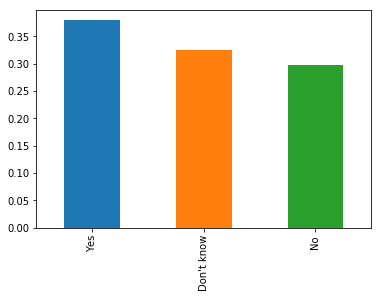

In [93]:
df.benefits.value_counts(normalize=True).plot.bar()

Example: Create a histogram of the distribution of Age values:

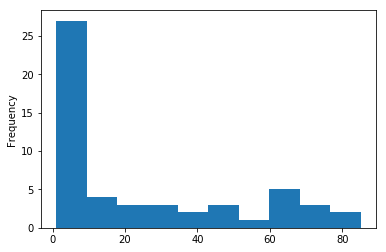

In [94]:
df.Age.value_counts().plot.hist()

### <font color="red">Q8: Experiment with the number of bins in the histogram of the Age distribution:</font>

Hint: use the bins= option to plot()

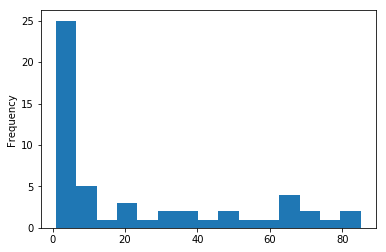

In [105]:
df.Age.value_counts().plot.hist(bins = 15)

## Discretization and Binning
Discretization of continuous variables can potentially enhance the goodness-of-fit of a statistical model. Age, for example, is a common varaible to be categorized.

### <font color="red">Q9: </font> Discretize the age into bins (16,21], (21,25], (25,30], (30, 35], (35,40], (40,50], (50,60], (60,).  

How many respondents are in each range? 
Hint: create a list of bin values
Hint: use pd.cut()
Hint: use value_counts()

In [107]:
bins = [15,20,25,30,35,40,50,60,200]

In [110]:
df['Age_group'] = pd.cut(df.Age, bins)
df.Age_group.value_counts()

(25, 30]     362
(30, 35]     339
(20, 25]     195
(35, 40]     185
(40, 50]     122
(50, 60]      22
(15, 20]      22
(60, 200]      4
Name: Age_group, dtype: int64

## Aggregation

Example: Find the size of each Age group.

Solution:

In [111]:
df.groupby('Age_group').size()

Age_group
(15, 20]      22
(20, 25]     195
(25, 30]     362
(30, 35]     339
(35, 40]     185
(40, 50]     122
(50, 60]      22
(60, 200]      4
dtype: int64

### <font color="red">Q10: Find the median age of each state. </font>

In [116]:
df.groupby('state')['Age'].median()

state
AL    34.0
AZ    33.0
CA    31.0
CO    31.0
CT    37.5
DC    37.5
FL    34.0
GA    30.0
IA    40.0
ID    55.0
IL    30.0
IN    34.0
KS    39.0
KY    24.0
LA    35.0
MA    32.0
MD    29.0
ME    40.0
MI    34.0
MN    30.0
MO    33.5
MS    33.0
NC    32.0
NE    26.0
NH    34.0
NJ    32.0
NM    29.5
NV    28.0
NY    29.0
OH    31.0
OK    26.5
OR    32.0
PA    31.0
RI    23.0
SC    30.0
SD    34.0
TN    33.0
TX    31.5
UT    28.0
VA    40.5
VT    34.0
WA    32.5
WI    33.0
WV    23.0
WY    41.5
Name: Age, dtype: float64

# Part 2 (on your own): Exploration of Movie Titles and Movie Cast

## Time to load some data:

In [117]:
titles = pd.read_csv('data/titles.csv', index_col=None)

The titles DataFrame contains a list of movie titles and release year

In [118]:
cast = pd.read_csv('data/cast.zip', index_col=None)

The ```cast``` DataFrame contains the following columns 

**title** = name of movie

**year** = year of movie

**name** = name of actor/actress

**type** = actor or actress

**character** = character name

**n** = number in the credits (NaN when not available)

In [119]:
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [120]:
cast.sample(5)

,title,year,name,type,character,n
2934134,Kathenas me tin trella tou...,1980,Mairi Hronopoulou,actress,Journalist,1.0
2367354,Love and a .45,1994,Wiley Wiggins,actor,Young Clerk,9.0
2967381,Zeta One,1969,Caroline Johnson,actress,Angvisa Girl,NaN
2033625,The Yellow Cameo,1928,Walter Shumway,actor,Deputy Sheriff,8.0
2410767,Hang Loose,2012,Michael (V) Wu,actor,Kevin and Grace's Dad,NaN


### Q11: How many entries are there in the cast table?

In [121]:
len(cast)

3634467

### Q12: How many entries are there in the titles table?

In [122]:
len(titles)

232330

## Some basic analyses

### Q13: What are the two earliest movies?

In [132]:
titles.sort_values(by='year').head(2)

,title,year
177757,Miss Jerry,1894
215272,The Startled Lover,1898


### Q14: How many movies have the title "Hamlet"?

In [173]:
len(titles[titles.title == 'Hamlet'])

,title,year,decades
6009,Hamlet,1948,1940
45350,Hamlet,1990,1990
46721,Hamlet,1910,1910
92146,Hamlet,1976,1970
94355,Hamlet,1987,1980
94554,Hamlet,2000,2000
98554,Hamlet,1921,1920
102919,Hamlet,2011,2010
122704,Hamlet,1969,1960
128388,Hamlet,1954,1950


### Q15: List all of the "Treasure Island" movies from earliest to most recent

In [138]:
titles[titles.title == 'Treasure Island'].sort_values(by = 'year')

,title,year
206027,Treasure Island,1918
51287,Treasure Island,1920
191050,Treasure Island,1934
96934,Treasure Island,1950
89534,Treasure Island,1972
111343,Treasure Island,1973
205397,Treasure Island,1985
179354,Treasure Island,1999


### Q16: List the supporting roles (having n=2) played by Cary Grant in the 1940s,
in order by year.

In [140]:
#(cast.year >= 1940) & (cast.year < 1950)
#(cast.year == 1940) | (cast.year == 1941)... 
# cast.year // 10 == 194
cast[(cast.n == 2.0) & (cast.year // 10 == 194) & (cast.name == 'Cary Grant')]

,title,year,name,type,character,n
845513,My Favorite Wife,1940,Cary Grant,actor,Nick Arden,2.0
845523,Penny Serenade,1941,Cary Grant,actor,Roger Adams,2.0


### Q17: What are the ten most common movie names of all time?

In [147]:
titles.title.value_counts().head(10)

Hamlet                  18
Carmen                  16
Macbeth                 15
The Outsider            12
Maya                    12
Temptation              11
Freedom                 11
Othello                 11
The Three Musketeers    11
Kismet                  11
Name: title, dtype: int64

### Q18: Plot the number of "Hamlet" films made each decade

Make sure your decades are in chronological order on the x-axis

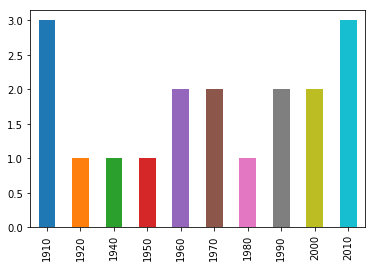

In [176]:
titles['decades'] = titles.year // 10 * 10
titles[titles.title == 'Hamlet'].decades.value_counts().sort_index().plot.bar()

### Q19: Who are the 10 people most often credited as "Herself" in film history?

In [213]:
cast[cast.character == 'Herself'].name.value_counts().head(12) # need to include ties

Queen Elizabeth II    11
Joyce Brothers         9
Margaret Thatcher      8
Hillary Clinton        7
Mary Jo Pehl           7
Sumie Sakai            6
Joan Rivers            6
Caroline Rhea          5
Kareena Kapoor         5
Bunny Yeager           5
Rekha                  5
Marilyn Monroe         5
Name: name, dtype: int64

### Q20: What are the 10 most frequent roles that start with the word "Science"?
Hint: read docs on str.startswith()

In [217]:
cast[cast.character.str.startswith('Science')].character.value_counts().head(13) # need to account for ties

Science Teacher         60
Science Fair Student     9
Science Student          9
Science Fair Judge       6
Science Club Member      5
Science Reporter         5
Science Kid              5
Science Promo Cadet      5
Science                  4
Science Fair Kid         3
Science Fair Teacher     3
Science teacher          3
Science Officer          3
Name: character, dtype: int64

### Q21: How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [219]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.type.value_counts()

actor      6616
actress    2965
Name: type, dtype: int64

### Q22: How many supporting (n=2) roles were available to actors,and how many to actresses, in the 1950s?

In [220]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 2]
c.type.value_counts()

actor      4564
actress    4556
Name: type, dtype: int64

### Q23: Comment on the differences in gender ratios for leading vs. supporting roles in the 1950s.  Does there appear to be a bias?

For leading roles, there are many more roles available for actors when compared to actresses; however, there is no discernable disparty when it comes to supporting roles.